In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filePath = r"C:/Users/Pdion/Downloads/Spotify_user_data/Spotify_data.csv"

df = pd.read_csv(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [32]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [52]:
#missing value fix
df = df.fillna("Unknown")
#fix col names
df = df.rename(columns = {
    'Age': 'age',
    'Gender': 'gender',
    'spotify_usage_period': 'usage_period',
    'spotify_listening_device': 'listening_device',
    'spotify_subscription_plan': 'subscription_plan',
    'premium_sub_willingness': 'premiumSub_willingness',
    'preffered_premium_plan': 'preferred_premium_plan',
    'preferred_listening_content': 'preferred_content',
    'fav_music_genre': 'fav_music_genre',
    'music_time_slot': 'music_time_slot',
    'music_Influencial_mood': 'influential_mood',
    'music_lis_frequency': 'music_listening_frequency',
    'music_expl_method': 'music_exploration_method',
    'music_recc_rating': 'music_reccomendation_rating',
    'pod_lis_frequency': 'podcast_listening_frequency',
    'fav_pod_genre': 'fav_podcast_genre',
    'preffered_pod_format': 'preferred_podcast_format',
    'pod_host_preference': 'podcast_host_preference',
    'preffered_pod_duration': 'preferred_podcast_duration',
    'pod_variety_satisfaction': 'podcast_variety_satisfaction'
})
# genre name clean up
genre_cleanup = {
"Melody": "Melody",
    "classical": "Classical",
    "Pop": "Pop",
    "Rap": "Rap",
    "Electronic/Dance": "Electronic/Dance",
    "ElectronicDance": "Electronic/Dance",
    "Rock": "Rock",
    "Kpop": "K-Pop",
    "Classical & melody, dance": "Classical/Melody",
    "old songs": "Old Songs",
    "trending songs random": "Trending/Random",
    "All": "All Genres"
}


df['fav_music_genre'] = df['fav_music_genre'].replace(genre_cleanup)

# make sure naming convention is printed correctly   
for col in df.columns:
    print(col)


    

age
gender
usage_period
listening_device
subscription_plan
premiumSub_willingness
preferred_premium_plan
preferred_content
fav_music_genre
music_time_slot
influential_mood
music_listening_frequency
music_exploration_method
music_reccomendation_rating
podcast_listening_frequency
fav_podcast_genre
preferred_podcast_format
podcast_host_preference
preferred_podcast_duration
podcast_variety_satisfaction


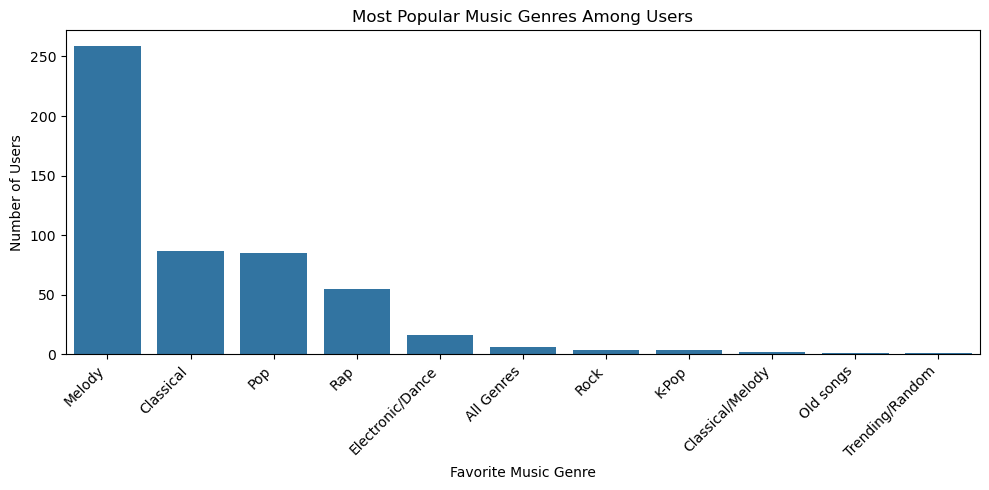

In [54]:
# visual 1 Favorite genre (bar chart)
genre_order = df['fav_music_genre'].value_counts().index

plt.figure(figsize=(10,5))
sns.countplot(
    data= df,
    x= 'fav_music_genre',
    order= genre_order
) 

plt.title("Most Popular Music Genres Among Users")
plt.xlabel("Favorite Music Genre")
plt.ylabel("Number of Users")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [68]:
#checking naming convention
df['music_exploration_method'].value_counts()
# chang naming to lowercase
df['music_exploration_method'] = df['music_exploration_method'].str.lower() 

# split on cammas and take the first method
df['music_exploration_method'] = df['music_exploration_method'].str.split(",").str[0].str.strip()

# clean the labels
method_map = {
    "recommendations": "Recommendations",
    "playlists": "Playlists",
    "radio": "Radio",
    "others": "Other",
    "social media": "Social Media",
    "friends": "Friends",
    "search": "Search"
}
df['music_exploration_method'] = df['music_exploration_method'].map(method_map).fillna("Other")

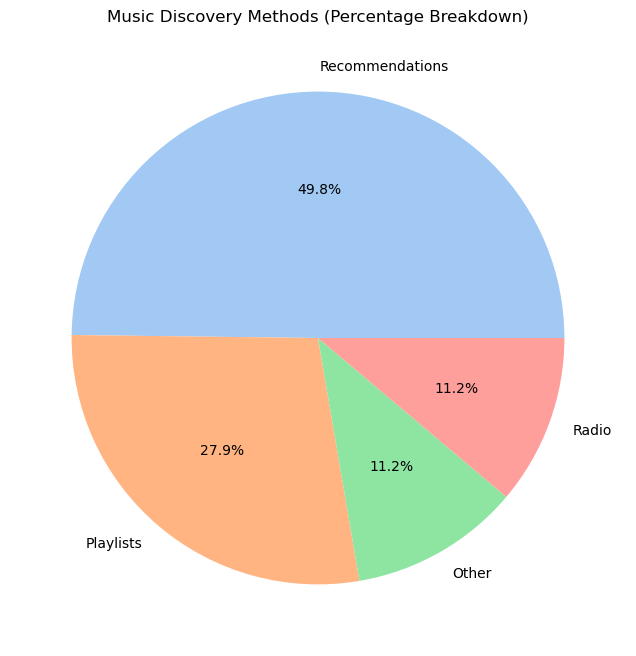

In [94]:
# Music Discovery Methods (Pie Chart)
plt.figure(figsize=(10,5))

colors = sns.color_palette("pastel")

df['music_exploration_method'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(8, 8),
    colors=colors
)
plt.title("Music Discovery Methods (Percentage Breakdown)")
plt.ylabel("")
plt.show()



In [82]:
df['influential_mood'].value_counts()

df['influential_mood'] = df['influential_mood'].str.lower()

df['influential_mood'] = df['influential_mood'].str.split(",").str[0].str.strip()

mood_map = {
    "relaxation and stress relief": "Relaxation/Stress Relief",
    "uplifting and motivational": "Uplifting/Motivational",
    "sadness or melancholy": "Sadness/Melancholy",
    "social gatherings or parties": "Social/Parties"
}
df['influential_mood'] = df['influential_mood'].map(mood_map).fillna("Other")

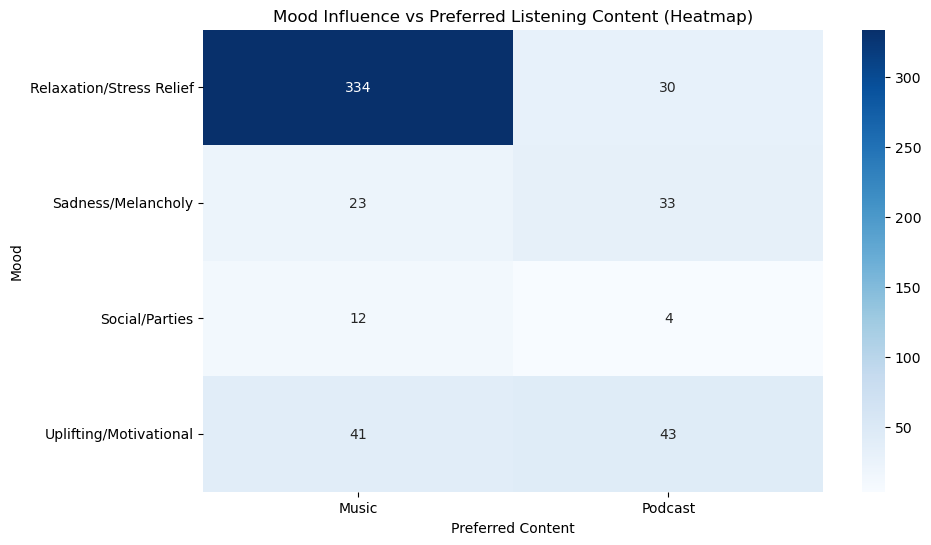

In [98]:

pivot_mood = pd.crosstab(df['influential_mood'], df['preferred_content'])

plt.figure(figsize=(10,6))

sns.heatmap(
    pivot_mood,
    annot=True,
    cmap="Blues",
    fmt="d"
)
plt.title("Mood Influence vs Preferred Listening Content (Heatmap)")
plt.xlabel("Preferred Content")
plt.ylabel("Mood")
plt.show()

In [100]:
df['music_time_slot'].value_counts()

music_time_slot
Night        312
Afternoon    117
Morning       91
Name: count, dtype: int64

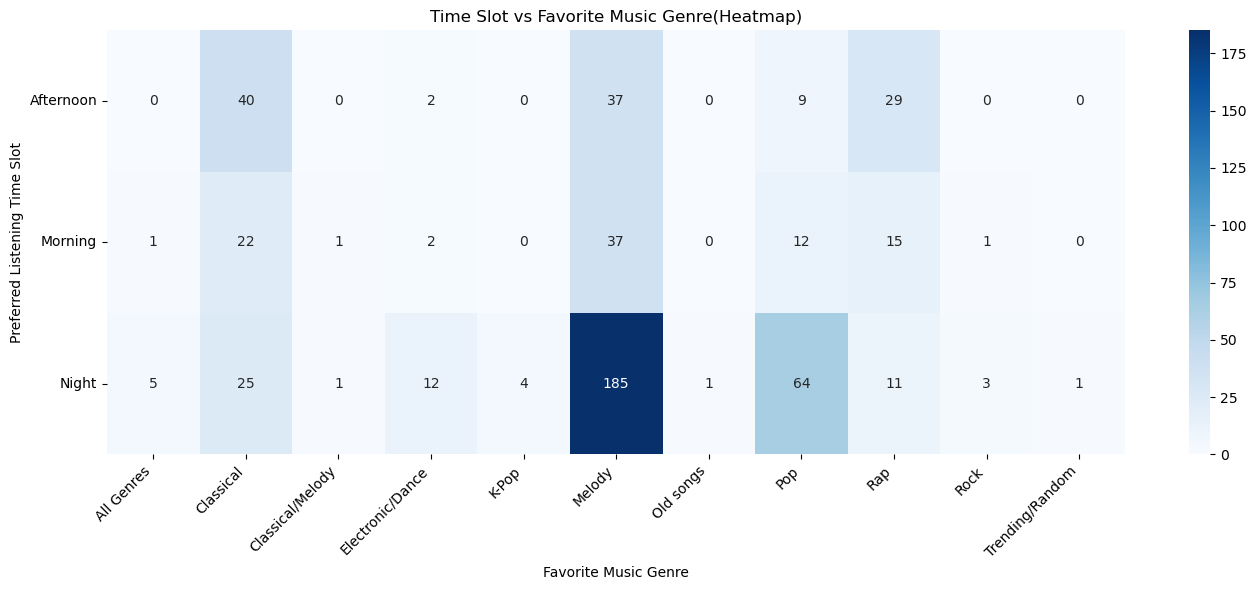

In [104]:
df['music_time_slot']=df['music_time_slot'].str.strip().str.title()

pivot_timeslot = pd.crosstab(
    df['music_time_slot'],
    df['fav_music_genre']
)

plt.figure(figsize=(14,6))
sns.heatmap(
    pivot_timeslot,
    annot=True,
    cmap="Blues",
    fmt="d"
)

plt.title("Time Slot vs Favorite Music Genre(Heatmap)")
plt.xlabel("Favorite Music Genre")
plt.ylabel("Preferred Listening Time Slot")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()